# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
layers=[]
layers.append(dict(type="Identity_Label"))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=16,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=16,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Relu",size=32))
layers.append(dict(type="Relu",size=49))
layers.append(dict(type="Reshape",shape=[-1,7,7,1]))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=16,relu=True))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))
layers.append(dict(type="Sigmoid_Feature"))

network_def=dict(type="Network",layers=layers)
network=Layer(x=data,**network_def)
network_test=network.copy(x=data_test,share_vars=True)
trainer=LabeledTrainer(network=network,optimizer="adam",loss="mean_squared_error")
tester=LabeledTrainer(network=network_test,loss="mean_squared_error",test=True)
sess=SessManager(data,network,trainer,data_test,network_test,tester)
sess.start()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Starting new session


In [27]:
batches_per_step=500
if "trains" not in globals():
    trains=[trainer.eval_loss(n=100)]
    tests=[tester.eval_loss()]
for i in range(50):
    trainer.train(batches_per_step,learn_rate=1e-3)
    trains.append(trainer.eval_loss(n=100)) 
    tests.append(tester.eval_loss())

0.0114598
0.0112391
0.0115469
0.0112636
0.0114515
0.0112258
0.0114671
0.0111814
0.011492
0.0112381
0.0113821
0.0110905
0.0112577
0.010993
0.011213
0.0110247
0.0112574
0.010944
0.011426
0.0111261
0.011282
0.0110204
0.0112329
0.0109011
0.0112609
0.010998
0.0111268
0.0108225
0.0111126
0.0109105
0.0111161
0.0108261
0.0111414
0.0108772
0.0111963
0.0109481
0.0113838
0.0110879
0.0109961
0.0106937
0.010894
0.0106717
0.0110158
0.0106896
0.0111739
0.0108857
0.0110011
0.0106999
0.0107583
0.0105865
0.0110379
0.0106785
0.0109002
0.0105697
0.0111585
0.010904
0.010828
0.0105499
0.0107676
0.0105418
0.0108295
0.010543
0.0107008
0.0104993
0.0106863
0.0104796
0.010807
0.0106423
0.0107162
0.0104656
0.0107956
0.0105662
0.0112901
0.0110172
0.0107469
0.0105086
0.0106678
0.0104392
0.0106701
0.0104085
0.0108295
0.0105339
0.0106418
0.0103904
0.0106018
0.0103839
0.0106356
0.0103277
0.0106252
0.0103807
0.0105997
0.0103115
0.0107387
0.0104467
0.0105419
0.0103316
0.0109517
0.0106628
0.0105366
0.0102886


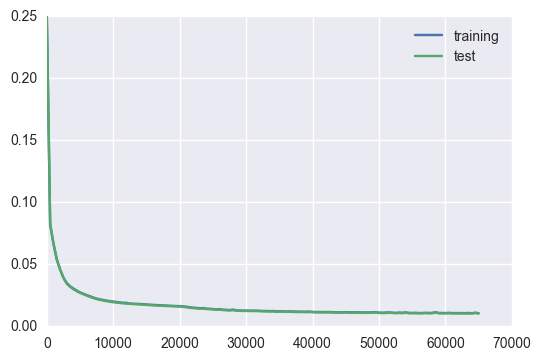

In [28]:
#Plot the training and testing error rates (add more steps to see overfitting)
x=[batches_per_step*i for i in range(len(trains))]
plt.plot(x,trains, label="training")
plt.plot(x,tests, label="test")
plt.legend()
#plt.ylim(0, .05)
plt.show()

In [5]:
network.save() #The full network definition
save=network.save() #The full network definition
assert(Layer(x=data,**save).save()==save) #Consistency
print(save==network_def) #Saving adds stuff, should still be equivalent
save

False


{'layers': [{'type': 'Identity_Label'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'rand_scale': 0.1, 'size': 32, 'type': 'Relu'},
  {'rand_scale': 0.1, 'size': 49, 'type': 'Relu'},
  {'shape': [-1, 7, 7, 1], 'type': 'Reshape'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 2,
   'type': 'Convolution_Transpose',
   'window': 5},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': False,
   'size': 1,
   'stride': 2,
   'type': 'Convolution_Tr

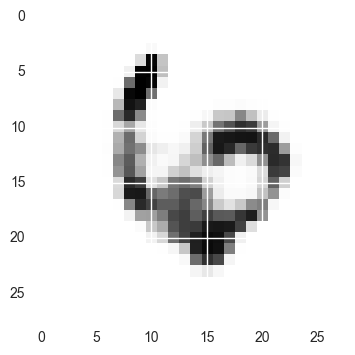

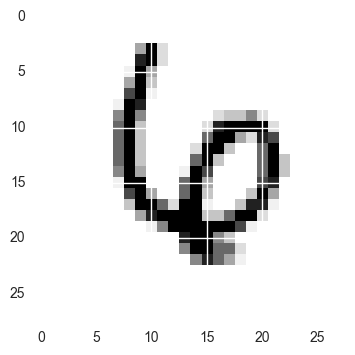

In [29]:
n=22
%matplotlib inline
plot(sess.run(network_test.get())[n,:,:,0])
plt.show()
%matplotlib inline
plot(sess.run(data_test.get())[n,:,:,0])

In [20]:
show(-sess.run(network_test.get())[n,:,:,0])
show(-sess.run(data_test.get())[n,:,:,0])